##Overview

Stripe is an online payment platform which is used by millions of businesses of all sizes - from startups to fortune 500's to accept payments, send out payouts, and manage their business.

## Problem statement: 

Identification of different businesses in the dataset and generating assignments for each merchant. Defining churn, identifyingt the merchants that have churned in the dataset. Build a model to predict which active merchants are most likely to churn in the near future.

## Tasks:

With the help of the given data of the merchants and their transactions:
1. Identify different kind of business in the sample
2. Generate assignment for each merchant 
3. Identify different kinds of business in the datase
4. Develop a concrete defintion for churn
5. Identify the merchants that have already churned in the dataset
6. Build a model to predict which active merchants are likely to churn in the near future


## Dataset Overview: 
The dataset has future merchant transaction activity, for merchants that span over a 2 year period (2033-2034). The data spans from 1/1/33 through 12/31/34.  
The data is made up, and can be considered as a random sample of future merchants using Stripe. 
Each observation is a transaction amount in cents. If the merchant stops processing with Stripe, then they would no longer appear. 

The dataset has three fatures:

1. Merchant - an unique identifier for each merchant
2. Time - timestamp when a merchant engages with the stripe platform to make a transaction
3. Amount usd in cents - the amount made by stripe in cents for every transaction made by the merchant


In [77]:
import pandas as pd
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

In [76]:
import squarify

In [5]:
#load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('takehome_ds_written.csv')

Saving takehome_ds_written.csv to takehome_ds_written.csv


In [6]:
shape = df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])


DataFrame Shape : (1513719, 4)

Number of rows : 1513719

Number of columns : 4


In [7]:
null_values = (df[df.merchant.isnull()].shape[0])
print('\nNo of transactions without a merchant :', null_values)


No of transactions without a merchant : 0


In [8]:
no_of_unique_merchants = df.merchant.nunique()
print('\nNo of Unique merchants in the data :', no_of_unique_merchants)   


No of Unique merchants in the data : 14351


In [9]:
#Understanding the data types in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513719 entries, 0 to 1513718
Data columns (total 4 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Unnamed: 0           1513719 non-null  int64 
 1   merchant             1513719 non-null  object
 2   time                 1513719 non-null  object
 3   amount_usd_in_cents  1513719 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ MB


In [10]:
#Converting time to datetime type 
df['time'] = pd.to_datetime(df.time)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513719 entries, 0 to 1513718
Data columns (total 4 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Unnamed: 0           1513719 non-null  int64         
 1   merchant             1513719 non-null  object        
 2   time                 1513719 non-null  datetime64[ns]
 3   amount_usd_in_cents  1513719 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 46.2+ MB


In [12]:
df

,Unnamed: 0,merchant,time,amount_usd_in_cents
0,1,faa029c6b0,2034-06-17 23:34:14,6349
1,2,ed7a7d91aa,2034-12-27 00:40:38,3854
2,3,5608f200cf,2034-04-30 01:29:42,789
3,4,15b1a0d61e,2034-09-16 01:06:23,4452
4,5,4770051790,2034-07-22 16:21:42,20203
...,...,...,...,...
1513714,1513715,72d37bedbf,2034-06-21 13:47:51,5274
1513715,1513716,5608f200cf,2034-04-20 02:23:59,754
1513716,1513717,fcbd1dae68,2033-09-19 14:02:33,13203
1513717,1513718,9843e52410,2034-12-28 20:07:59,4845


In [13]:
df['amount_usd_in_cents'].describe()

count    1.513719e+06
mean     1.548466e+04
std      6.161886e+04
min      2.010000e+02
25%      3.215000e+03
50%      6.104000e+03
75%      1.260600e+04
max      2.592028e+07
Name: amount_usd_in_cents, dtype: float64

In [14]:
print('\nTransaction in the data timeframe from {} to {}'.format(df['time'].min() , df['time'].max()))


Transaction in the data timeframe from 2033-01-01 09:38:32 to 2034-12-31 07:59:40


In [15]:
#Lets get some eda on the data to understand the distribution of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1513719.0,756860.000000,436973.180400,1.0,378430.5,756860.0,1135289.5,1513719.0
amount_usd_in_cents,1513719.0,15484.660827,61618.863763,201.0,3215.0,6104.0,12606.0,25920280.0


In [16]:
#Lets find the most recent transaction date in the data and add
most_recent_date = df['time'].max() + timedelta(days=1)
print('\nThe latest transaction in te dataset' , most_recent_date)


The latest transaction in te dataset 2035-01-01 07:59:40


In [17]:
#Calculating the no of days since the merchant was a recent merchant based on thel latest transaction date. 
#Calcultating the no frequency of transactions of the merchant in the dataset
#Calculating the amount spent in cents by the customer

In [18]:
data_collected = df.groupby(['merchant']).agg({'time' : lambda x: (most_recent_date - x.max()).days,
                                               'merchant': 'count',
                                               'amount_usd_in_cents' : 'sum'})
data_collected.columns

Index(['time', 'merchant', 'amount_usd_in_cents'], dtype='object')

In [19]:
#Rename the column names:
data_collected.columns

Index(['time', 'merchant', 'amount_usd_in_cents'], dtype='object')

In [20]:
data_collected.rename(columns={'time' : 'recency_of_merchant', 'merchant' : 'frequency_of_transactions', 'amount_usd_in_cents' : 'Money_spent'}, inplace = True)

In [21]:
#Check the data collected dataframe
print(data_collected.head())

            recency_of_merchant  frequency_of_transactions  Money_spent
merchant                                                               
0002b63b92                  594                          1         3379
0002d07bba                   16                          4        89278
00057d4302                  515                         28        29521
000bcff341                  509                          1         7826
000ddbf0ca                  577                          1        10299


In [22]:
#Check the rows and columns in the data: 
shape = data_collected.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])


DataFrame Shape : (14351, 3)

Number of rows : 14351

Number of columns : 3


Let's have a look at the distribution of the data in the dataframe: 


In [23]:
import seaborn as sns; sns.set() 

Visualize the data to get an idea about the distribution of the data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

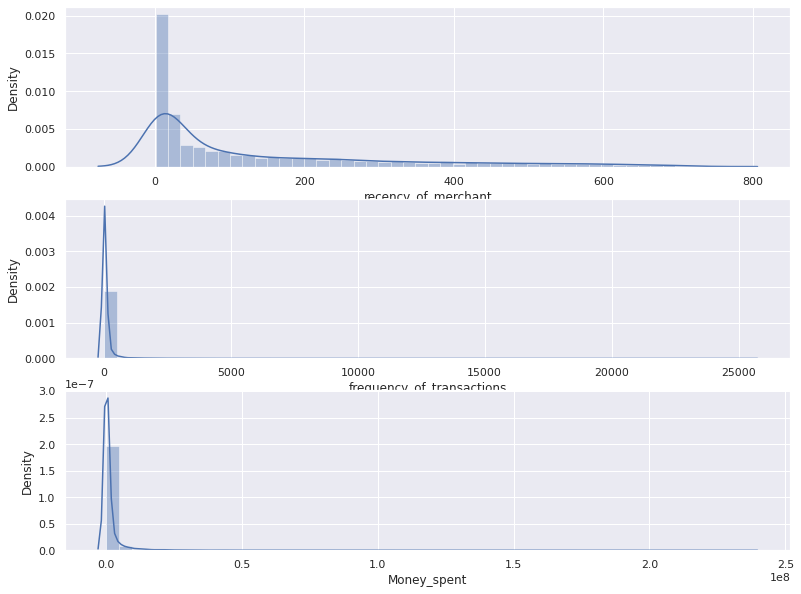

In [24]:
plt.figure(figsize=(13,10))
plt.subplot(3,1,1); sns.distplot(data_collected['recency_of_merchant'])
plt.subplot(3,1,2); sns.distplot(data_collected['frequency_of_transactions'])
plt.subplot(3,1,3); sns.distplot(data_collected['Money_spent'])
plt.show()

We can see that the data is skewed, but we will be using quartiles to categorzie the data so we do not need to perform any normalization techniques on the data

In [25]:
recency_labels = range(4,0,-1); f_labels = range(1,5)
recency_groups = pd.qcut(data_collected['recency_of_merchant'], q = 4, labels = recency_labels)
frequency_groups = pd.qcut(data_collected['frequency_of_transactions'], q = 4, labels=f_labels)
data_collected = data_collected.assign(R = recency_groups.values, F = frequency_groups.values)
money_groups = pd.qcut(data_collected['Money_spent'], q = 4, labels = f_labels)
data_collected = data_collected.assign(M = money_groups.values)
data_collected.head()

,recency_of_merchant,frequency_of_transactions,Money_spent,R,F,M
merchant,,,,,,
0002b63b92,594,1,3379,1,1,1
0002d07bba,16,4,89278,3,2,2
00057d4302,515,28,29521,1,3,1
000bcff341,509,1,7826,1,1,1
000ddbf0ca,577,1,10299,1,1,1


Demonstartion to show how the quartiles are assigned in the data. 

In [26]:
data_collected['recency_of_merchant'].describe()

count    14351.000000
mean       137.266532
std        174.497343
min          1.000000
25%         10.000000
50%         52.000000
75%        213.000000
max        729.000000
Name: recency_of_merchant, dtype: float64

In [27]:
pd.qcut(data_collected['recency_of_merchant'], q=4)

merchant
0002b63b92    (213.0, 729.0]
0002d07bba      (10.0, 52.0]
00057d4302    (213.0, 729.0]
000bcff341    (213.0, 729.0]
000ddbf0ca    (213.0, 729.0]
                   ...      
ffd3e45675    (213.0, 729.0]
ffe1f6b51a    (213.0, 729.0]
ffe26b900d      (10.0, 52.0]
ffec05edb9    (213.0, 729.0]
fff1754102     (0.999, 10.0]
Name: recency_of_merchant, Length: 14351, dtype: category
Categories (4, interval[float64, right]): [(0.999, 10.0] < (10.0, 52.0] < (52.0, 213.0] <
                                           (213.0, 729.0]]

In [28]:
def join_rec_fre_money(x): return str(x['R']) + str(x['F']) + str(x['M'])
data_collected['RFM_concat'] = data_collected.apply(join_rec_fre_money, axis=1)
rec_freq_money = data_collected
rec_freq_money.head()

,recency_of_merchant,frequency_of_transactions,Money_spent,R,F,M,RFM_concat
merchant,,,,,,,
0002b63b92,594,1,3379,1,1,1,111
0002d07bba,16,4,89278,3,2,2,322
00057d4302,515,28,29521,1,3,1,131
000bcff341,509,1,7826,1,1,1,111
000ddbf0ca,577,1,10299,1,1,1,111


In [29]:
rfm_count_unique = rec_freq_money.groupby('RFM_concat')['RFM_concat'].nunique()
print(rfm_count_unique.sum())

61


In [30]:
# Calculate RFM_Score
rec_freq_money['RFM_Score'] = rec_freq_money[['R','F','M']].sum(axis=1)
print(rec_freq_money['RFM_Score'].head())

merchant
0002b63b92    3
0002d07bba    7
00057d4302    5
000bcff341    3
000ddbf0ca    3
Name: RFM_Score, dtype: int64


In [31]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Highly valuable merchants'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Potential high valuable merchants'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'New'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rec_freq_money['RFM_Level'] = rec_freq_money.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rec_freq_money.head()

,recency_of_merchant,frequency_of_transactions,Money_spent,R,F,M,RFM_concat,RFM_Score,RFM_Level
merchant,,,,,,,,,
0002b63b92,594,1,3379,1,1,1,111,3,Require Activation
0002d07bba,16,4,89278,3,2,2,322,7,Loyal
00057d4302,515,28,29521,1,3,1,131,5,Promising
000bcff341,509,1,7826,1,1,1,111,3,Require Activation
000ddbf0ca,577,1,10299,1,1,1,111,3,Require Activation


Merchants with high frequency transactions on a daily basis, might be used by the customers who use stripe as an option for their payments such as online, digital wallet 

Monthly renewing payments or subscriptions, where the frequency of transaction for every merchant is 1 for each month with the same amount recurring every month could be the "Recurring payment businesses"

Businesses such as Banks or companies who use stripe for ACH credit or debits to the customers

Businesses who use stripe as a platform for wire transfer, international payments

In [32]:
rec_freq_money.shape

(14351, 9)

In [33]:
# Define churn level function based on the assigned merchants
def churn_level(df):
    if df['RFM_Score'] >= 9:
        return 1
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 1
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 1
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 1
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 1
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 0
    else:
        return 0
# Create a new variable RFM_Level
rec_freq_money['churn_level'] = rec_freq_money.apply(churn_level, axis=1)
# Print the header with top 5 rows to the console
rec_freq_money.head()

,recency_of_merchant,frequency_of_transactions,Money_spent,R,F,M,RFM_concat,RFM_Score,RFM_Level,churn_level
merchant,,,,,,,,,,
0002b63b92,594,1,3379,1,1,1,111,3,Require Activation,0
0002d07bba,16,4,89278,3,2,2,322,7,Loyal,1
00057d4302,515,28,29521,1,3,1,131,5,Promising,1
000bcff341,509,1,7826,1,1,1,111,3,Require Activation,0
000ddbf0ca,577,1,10299,1,1,1,111,3,Require Activation,0


Out of 14351 there are 2468 merchants that churned away based on the way we defined the customers, considering all the merchants which were promising, loyal, potential, Champions loyal as active and merchants which are classified as required activation, need attention can be classified as inactive i.e they have left the service

In [34]:
rec_freq_money['churn_level'].value_counts()

1    11883
0     2468
Name: churn_level, dtype: int64

We can see that there are **2468** merchants that have churned from the service based on our definition of churned and unchurned merchants




# Build a model for prediciton: 
I will be using Logistic Regression model for predicting which merchants that might churn. 
We know that there are less churned merchants than the unchurned merchants for this we will be making use of undersampling technique to overcome the imbalanced class problem and to tackle the problem of overfitting 

Training of the data: 

In [35]:
#Logisitc Regression to predict churn:
Y = rec_freq_money['churn_level']

In [36]:
rec_freq_money.columns

Index(['recency_of_merchant', 'frequency_of_transactions', 'Money_spent', 'R',
       'F', 'M', 'RFM_concat', 'RFM_Score', 'RFM_Level', 'churn_level'],
      dtype='object')

In [37]:
X = rec_freq_money[['recency_of_merchant', 'frequency_of_transactions' , 'Money_spent']]

In [38]:
X

,recency_of_merchant,frequency_of_transactions,Money_spent
merchant,,,
0002b63b92,594,1,3379
0002d07bba,16,4,89278
00057d4302,515,28,29521
000bcff341,509,1,7826
000ddbf0ca,577,1,10299
...,...,...,...
ffd3e45675,704,5,72626
ffe1f6b51a,316,53,281616
ffe26b900d,40,81,959113


In [39]:
count_class_1, count_class_0 = rec_freq_money.churn_level.value_counts()

In [40]:
count_class_0

2468

In [41]:
df_class_0 = rec_freq_money[rec_freq_money['churn_level'] == 0]
df_class_1= rec_freq_money[rec_freq_money['churn_level'] == 1]

In [42]:
df_class_0.shape

(2468, 10)

In [43]:
df_class_1.shape # need to undersample this class

(11883, 10)

In [44]:
df_class_1_under = df_class_1.sample(count_class_0)
df_class_1_under.shape

(2468, 10)

In [45]:
df_class_1_under

,recency_of_merchant,frequency_of_transactions,Money_spent,R,F,M,RFM_concat,RFM_Score,RFM_Level,churn_level
merchant,,,,,,,,,,
8e878323da,7,22,887214,4,3,4,434,11,Highly valuable merchants,1
6d3632fe2b,28,5,16828,3,2,1,321,6,New,1
dcfb1e519e,1,26,143593,4,3,2,432,9,Highly valuable merchants,1
03cd6e301b,19,12,36103,3,3,1,331,7,Loyal,1
03234a5a33,1,129,320360,4,4,3,443,11,Highly valuable merchants,1
...,...,...,...,...,...,...,...,...,...,...
e998db145c,38,19,15514,3,3,1,331,7,Loyal,1
46479e6b66,80,3,213799,2,1,3,213,6,New,1
83d81afdf6,12,18,437637,3,3,3,333,9,Highly valuable merchants,1


In [46]:
df_test_under = pd.concat([df_class_1_under, df_class_0], axis = 0)
df_test_under.shape

(4936, 10)

In [47]:
df_test_under

,recency_of_merchant,frequency_of_transactions,Money_spent,R,F,M,RFM_concat,RFM_Score,RFM_Level,churn_level
merchant,,,,,,,,,,
8e878323da,7,22,887214,4,3,4,434,11,Highly valuable merchants,1
6d3632fe2b,28,5,16828,3,2,1,321,6,New,1
dcfb1e519e,1,26,143593,4,3,2,432,9,Highly valuable merchants,1
03cd6e301b,19,12,36103,3,3,1,331,7,Loyal,1
03234a5a33,1,129,320360,4,4,3,443,11,Highly valuable merchants,1
...,...,...,...,...,...,...,...,...,...,...
ff3e0ba228,338,2,81070,1,1,2,112,4,Needs Attention,0
ff7fdd71a0,54,3,26952,2,1,1,211,4,Needs Attention,0
ffaeb2e3ce,652,1,5344,1,1,1,111,3,Require Activation,0


In [48]:
df_test_under.churn_level.value_counts()

1    2468
0    2468
Name: churn_level, dtype: int64

In [49]:
X = df_test_under[['recency_of_merchant', 'frequency_of_transactions', 'Money_spent']]

In [50]:
Y = df_test_under['churn_level']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=15, stratify = Y)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [66]:
y_test.size

988

In [53]:
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.9362348178137652


In [69]:
cf_matrix = confusion_matrix(y_test, prediction_test)
cf_matrix

array([[452,  42],
       [ 21, 473]])

In [64]:
tn, fp, fn, tp = confusion_matrix(y_test, prediction_test).ravel()
tn, fp, fn, tp

(452, 42, 21, 473)

In [68]:
cf_matrix = confusion_matrix(y_test, prediction_test)
cf_matrix

array([[452,  42],
       [ 21, 473]])

In [73]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,prediction_test)
accuracy

0.9362348178137652

In [56]:
print("Classification Report: \n", classification_report(y_test, prediction_test))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       494
           1       0.92      0.96      0.94       494

    accuracy                           0.94       988
   macro avg       0.94      0.94      0.94       988
weighted avg       0.94      0.94      0.94       988



We can see that the accuracy on predicting the unchurned merchant is higher than the churned merchant this can be due to the fact that the has more classes of 1s's than 0's and the model is overfitting the data. in order to make sure that the classifier works better on both the classes we will be making use of the smote method to create more churned classes and creating classes equal to the unchurned classes